### Intermediate Representation

* 3-Address Opcodes =  1 Operator only 
* Quadraples with 3AO e.g  %1 = a + b (llvm)
* Triples with 3AO for "b * (-c)" =  (0) minus c, (1) mul b (0) (stack model in java)


###  Single Static Assignment

* IR with property that each variable is assigned once and defined before its use. (Data flow) and merge operator phi for selection of values on control flow join.
* Single Variable in HLL split into versions 

* Steps
  + Create Control FLow graph and Dominator frontier
  + introduce statements with assignments to phi functions in join nodes and r
  + rename variables those are targests of more than one definition
  
*  Note every join needs phi
*  Minimize # of Phis 

   + Simple Illustration
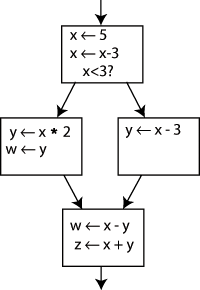  

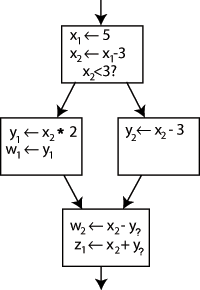

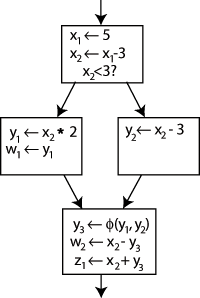

* Pruned SSA
  + Inserts phi  for variable v, if v is *live* at entry of Block. lower phis, high cost of global liveness
*  Semi Pruned SSA
  + Skip Local Variables for liveness. For non-local definitions, compute dominator frontier rather than live variable analysis.
* [Memory SSA](https://llvm.org/docs/MemorySSA.html)
    + interactions between various memory operations
    + Improvement to MemoryDependenceAnalysis in LLVM

#### Lowering phi
* SSA is not machine level representation
  + Insert Copy into all predecessors of BB with phi ( using Dead Code Elimination for removal of redundant assignments)
  + Why ?   Register Allocator Requirement since machine level dont understand phis
  + [PHIElimination in LLVM](https://llvm.org/doxygen/PHIElimination_8cpp_source.html)


#### Use-define chain
* Data structure with pair of   Use (U) of variable and All its definations (D)
* For Statement  S(i) as definition ,there is exactly one initializtion


### Analysis Consumed by SSA
* Dominator Tree 
   + Given two nodes x and y in a flow graph, x dominates y if x appears in all paths from the Start node to y. The node x strictly dominates y if x dominates y and x = y. 
   + x is the immediate dominator of y (denoted idom[y]) if x is the closest strict dominator of y. A dominator tree shows all the immediate dominator relationships. 
   + For a flow graph node x, the set of all flow graph nodes y, such that x dominates a predecessor of y but does not strictly dominate y, is called the dominance frontier of x
#### Analysis Produced By SSA
* Liveness Analysis

#### Optimization enhanced with SSA
* Dead code elimination
* Constant Propogation
* Value Numbering in LLVM
     + LLVM Uses Global Value Numbering for unique names to each SSA value.
     + [Value Numbering Pass](https://github.com/llvm/llvm-project/blob/release/15.x/llvm/lib/Transforms/Scalar/NewGVN.cpp)
     + Common Subexpression elimination by naming